In [1]:
import torch
from ultralytics import YOLO
import os
import cv2
import pandas as pd

In [12]:

model=YOLO('Model/ver4/train3/weights/best.pt')

In [13]:
# 포크리프트 1
img1=cv2.imread('실험/image/vv2.jpg')
img2=cv2.imread('실험/image/231231_1600_Cam5_C2 (1758).jpg')
img3=cv2.imread('실험/image/포크부분.png')

In [4]:
result=model.predict(img1)
for r in result:
    print(r)


0: 384x640 1 forklift_s, 92.1ms
Speed: 8.7ms preprocess, 92.1ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person_o', 1: 'person_x', 2: 'forklift_w', 3: 'forklift_a', 4: 'forklift_s', 5: 'forklift_d', 6: 'trolly'}
obb: None
orig_img: array([[[ 42,  40,  39],
        [ 31,  32,  30],
        [ 23,  24,  22],
        ...,
        [ 39,  52,  50],
        [ 39,  52,  50],
        [ 39,  52,  50]],

       [[ 36,  39,  37],
        [ 30,  33,  31],
        [ 24,  27,  25],
        ...,
        [ 39,  52,  50],
        [ 39,  52,  50],
        [ 39,  52,  50]],

       [[ 30,  39,  36],
        [ 26,  35,  32],
        [ 26,  31,  29],
        ...,
        [ 39,  52,  50],
        [ 39,  52,  50],
        [ 39,  52,  50]],

       ...,

       [[ 90, 104,  93],
        [ 91, 105,  94],
        [ 90, 103,  95],
        ...,


In [5]:
result=model.predict(img2)
for r in result:
    r=r.boxes
    #cv2.imwrite('dd.jpg',r)
r


0: 384x640 3 person_os, 1 forklift_a, 40.0ms
Speed: 3.0ms preprocess, 40.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 0., 0., 0.])
conf: tensor([0.9626, 0.9331, 0.8834, 0.8764])
data: tensor([[4.7303e+02, 1.8243e+02, 9.6175e+02, 5.9797e+02, 9.6260e-01, 3.0000e+00],
        [9.3524e+02, 5.7714e+02, 1.1336e+03, 7.1328e+02, 9.3309e-01, 0.0000e+00],
        [5.8803e+02, 6.5485e+02, 7.2404e+02, 7.2000e+02, 8.8342e-01, 0.0000e+00],
        [9.3438e+02, 2.4524e+02, 1.0395e+03, 3.7042e+02, 8.7636e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([4, 6])
xywh: tensor([[ 717.3885,  390.1982,  488.7214,  415.5376],
        [1034.4413,  645.2080,  198.3992,  136.1443],
        [ 656.0315,  687.4270,  136.0100,   65.1460],
        [ 986.9539,  307.8315,  105.1384,  125.1823]])
xywhn: tensor([[0.5605, 0.5419, 0.3818, 0.5771],
        [0.8082, 0.8961, 0.1550, 0.1891],
        [0.5125, 0.9548, 0.1063, 0.0905],
        [0.7711, 0.4275, 0.0821, 0.1739]])
xyxy: tensor([[ 473.0278,  182.4295,  961.7493,  597.967

In [7]:
result=model.predict(img2,save_txt=True,save=True)
for r in result:
    DF=r.to_df()
    personDF=DF[(DF['class']==0)|(DF['class']==1)]
    carDF=DF.drop(personDF.index)
    print(r[3].boxes.xywh)



0: 384x640 3 person_os, 1 forklift_a, 57.1ms
Speed: 2.4ms preprocess, 57.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\KDP-30\runs\detect\predict4
1 label saved to c:\Users\KDP-30\runs\detect\predict4\labels
tensor([[986.9539, 307.8315, 105.1384, 125.1823]])


In [ ]:
personDF

,name,class,confidence,box
0,person_o,0,0.92648,"{'x1': 932.78784, 'y1': 578.05078, 'x2': 1134...."
2,person_o,0,0.88679,"{'x1': 930.29053, 'y1': 241.26184, 'x2': 1039...."
3,person_o,0,0.86928,"{'x1': 588.40881, 'y1': 654.40399, 'x2': 716.0..."


In [ ]:
carDF

,name,class,confidence,box
1,forklift_d,5,0.92355,"{'x1': 467.78302, 'y1': 197.39716, 'x2': 960.9..."


In [ ]:
0 in list(DF['class'])

True

In [ ]:
# 안전모 x
if 1 in list(DF['class']):
    print('안전모써!!')

In [ ]:
# 사람vs 차
for c in carDF.box:
    for p in personDF.box:
        print(r.boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0.])
conf: tensor([0.9171, 0.8175])
data: tensor([[7.1157e+02, 3.0674e+02, 1.4440e+03, 8.9766e+02, 9.1709e-01, 5.0000e+00],
        [5.4984e+02, 3.0369e+02, 7.0931e+02, 6.6777e+02, 8.1753e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1084, 1915)
shape: torch.Size([2, 6])
xywh: tensor([[1077.8075,  602.2028,  732.4714,  590.9177],
        [ 629.5732,  485.7299,  159.4682,  364.0724]])
xywhn: tensor([[0.5628, 0.5555, 0.3825, 0.5451],
        [0.3288, 0.4481, 0.0833, 0.3359]])
xyxy: tensor([[ 711.5718,  306.7440, 1444.0432,  897.6616],
        [ 549.8391,  303.6937,  709.3073,  667.7661]])
xyxyn: tensor([[0.3716, 0.2830, 0.7541, 0.8281],
        [0.2871, 0.2802, 0.3704, 0.6160]])


In [ ]:
carDF

,name,class,confidence,box
1,forklift_d,5,0.92355,"{'x1': 467.78302, 'y1': 197.39716, 'x2': 960.9..."


In [8]:
result=model.predict(img2,save_txt=True,save=True)
ratio=1.7
for r in result:
    DF=r.to_df()
    personDF=DF[(DF['class']==0)|(DF['class']==1)]  # 사람 관련 DF
    carDF=DF.drop(personDF.index)       # 차량 관련 DF
    if len(personDF)*len(carDF):        # 차와 사람이 둘다있을경우만 진행
        for c_idx in carDF.index:
            w,a,s,d=1,1,1,1
            c=carDF.loc[c_idx,'box']
            if carDF.loc[c_idx,'class']==2:
                w=ratio
            elif carDF.loc[c_idx,'class']==3:
                a=ratio
            elif carDF.loc[c_idx,'class']==4:
                s=ratio
            elif carDF.loc[c_idx,'class']==3:
                d=ratio
            for p in personDF.box:
                if ((c['x1']*a<=p['x1']<=c['x2']*d) or (c['x1']*a<=p['x2']<=c['x2']*d)) and ((c['y1']*w<=p['y1']<=c['y2']*s) or (c['y1']*w<=p['y2']<=c['y2']*s)) :
                    print('사고났다!')


0: 384x640 3 person_os, 1 forklift_a, 79.0ms
Speed: 1.0ms preprocess, 79.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\KDP-30\runs\detect\predict4
1 label saved to c:\Users\KDP-30\runs\detect\predict4\labels
사고났다!
사고났다!


In [ ]:
result=model.predict(img3,save_txt=True,save=True)
ratio=0.7
for r in result:
    DF=r.to_df()
    personDF=DF[(DF['class']==0)|(DF['class']==1)]  # 사람 관련 DF
    carDF=DF.drop(personDF.index)       # 차량 관련 DF
    #carDF['class']=3
    if len(personDF)*len(carDF):        # 차와 사람이 둘다있을경우만 진행
        for c_idx in carDF.index:
            w,a,s,d=1,1,1,1
            c=carDF.loc[c_idx,'box']
            if carDF.loc[c_idx,'class']==2:
                w=ratio
            elif carDF.loc[c_idx,'class']==3:
                a=ratio
            elif carDF.loc[c_idx,'class']==4:
                s=ratio
            elif carDF.loc[c_idx,'class']==3:
                d=ratio
            wid=c['x2']-c['x1']
            print(wid==r[c_idx].boxes.xywh[2])
            hei=c['y2']-c['y1']
            for p in personDF.box:
                if ((c['x1']-wid*a<=p['x1']<=c['x2']+wid*d) or (c['x1']-wid*a<=p['x2']<=c['x2']+wid*d)) and ((c['y1']-hei*w<=p['y1']<=c['y2']+hei*s) or (c['y1']-hei*w<=p['y2']<=c['y2']+hei*s)) :
                    print('사고났다!')


0: 384x640 1 person_o, 1 forklift_d, 95.9ms
Speed: 2.0ms preprocess, 95.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\KDP-30\runs\detect\predict
1 label saved to c:\Users\KDP-30\runs\detect\predict\labels


IndexError: index 2 is out of bounds for dimension 0 with size 1

In [ ]:
carDF

,name,class,confidence,box
0,forklift_d,3,0.91709,"{'x1': 711.57184, 'y1': 306.74396, 'x2': 1444...."


In [14]:
def car_accident(r,ratio=0.7):
    if len(r)>=3:
        DF=r.to_df()
        personDF=DF[(DF['class']==0)|(DF['class']==1)]  # 사람 관련 DF
        carDF=DF.drop(personDF.index)       # 차량 관련 DF
        w,a,s,d=0,0,0,0                           # 4방향 가중치 초기화
        if len(personDF)*len(carDF):        # 차와 사람이 둘다있을경우만 진행
            for c_idx in carDF.index:
                c=carDF.loc[c_idx,'box']
                if carDF.loc[c_idx,'class']==2:            # w 방향 가중치
                    w=ratio
                elif carDF.loc[c_idx,'class']==3:           # a 방향 가중치
                    a=ratio
                elif carDF.loc[c_idx,'class']==4:           # s 방향 가중치
                    s=ratio
                elif carDF.loc[c_idx,'class']==3:           # d 방향 가중치
                    d=ratio
                wid=c['x2']-c['x1']         # 차너비
                hei=c['y2']-c['y1']         # 차높이
                for p in personDF.box:
                    if ((c['x1']-wid*a<=p['x1']<=c['x2']+wid*d) or (c['x1']-wid*a<=p['x2']<=c['x2']+wid*d)) and ((c['y1']-hei*w<=p['y1']<=c['y2']+hei*s) or (c['y1']-hei*w<=p['y2']<=c['y2']+hei*s)) :
                        print('사고났다!')
                    else:
                        print('사고안남')

In [ ]:
video_path='Detect_test_Cam5.MP4'
model.predict(video_path,save=True)
#video = cv2.VideoCapture(video_path)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/11890) c:\KDT\\Detect_test_Cam5.MP4: 384x640 (no detections), 92.4ms
video 1/1 (frame 2/11890) c:\KDT\\Detect_test_Cam5.MP4: 384x640 (no detections), 72.1ms
video 1/1 (frame 3/11890) c:\KDT\\Detect_test_Cam5.MP4: 384x640 (no detections), 97.6ms
video 1/1 (frame 4/11890) c:\KDT\\Detect_test_Cam5.MP4: 384x640 (no detections), 85.0ms
video 1/1 (frame 5/11890) c:\KDT\\Detect_test_Cam5.MP4: 384x640 (no detections), 77.0ms
video 1/1 (frame 6

KeyboardInterrupt: 

In [10]:
import matplotlib.pyplot as plt
#video_path='Detect_test_Cam6.MP4'
cap=cv2.VideoCapture('실험/image/vv0.jpg')
ret,frame=cap.read()
result=model.predict(frame)
for r in result:
    boxes=r.boxes.xyxy
    for box in boxes:
        x1,y1,x2,y2=box

    r_img=r.orig_img
#plt.imshow(r_img)


0: 384x640 1 forklift_s, 1 forklift_d, 47.1ms
Speed: 17.0ms preprocess, 47.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\KDP-30\runs\detect\predict4
1 label saved to c:\Users\KDP-30\runs\detect\predict4\labels



0: 384x640 3 person_os, 1 forklift_a, 93.1ms
Speed: 40.0ms preprocess, 93.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\KDP-30\runs\detect\predict3
3 labels saved to c:\Users\KDP-30\runs\detect\predict3\labels
사고났다!
사고안남
사고났다!


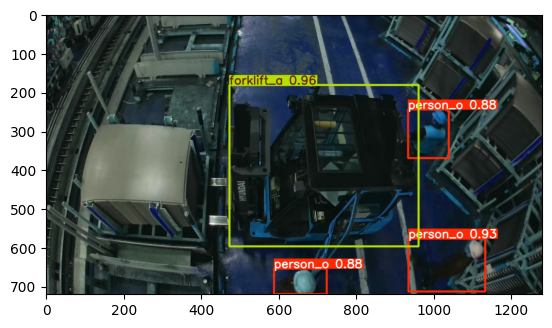

In [ ]:
# cap=cv2.VideoCapture(r'실험\image\포크부분.png')
# ret,frame=cap.read()
frame=cv2.imread(r'실험\image\231231_1600_Cam5_C2 (1758).jpg')
result=model.predict(frame)
ratio=0.7
for r in result:
    i=r.plot()
    DF=r.to_df()
    personDF=DF[(DF['class']==0)|(DF['class']==1)]  # 사람 관련 DF
    carDF=DF.drop(personDF.index)       # 차량 관련 DF
    w,a,s,d=0,0,0,0                           # 4방향 가중치 초기화
    if len(personDF)*len(carDF):        # 차와 사람이 둘다있을경우만 진행
        for c_idx in carDF.index:
            c=carDF.loc[c_idx,'box']
            if carDF.loc[c_idx,'class']==2:            # w 방향 가중치
                w=ratio
            elif carDF.loc[c_idx,'class']==3:           # a 방향 가중치
                a=ratio
            elif carDF.loc[c_idx,'class']==4:           # s 방향 가중치
                s=ratio
            elif carDF.loc[c_idx,'class']==3:           # d 방향 가중치
                d=ratio
            wid=c['x2']-c['x1']         # 차너비
            hei=c['y2']-c['y1']         # 차높이
            for p in personDF.box:
                if ((c['x1']-wid*a<=p['x1']<=c['x2']+wid*d) or (c['x1']-wid*a<=p['x2']<=c['x2']+wid*d)) and ((c['y1']-hei*w<=p['y1']<=c['y2']+hei*s) or (c['y1']-hei*w<=p['y2']<=c['y2']+hei*s)) :
                    print('사고났다!')
                else:
                    print('사고안남')
    else:
        print('뭐없음')
plt.imshow(i)


0: 384x640 1 person_o, 1 person_x, 1 forklift_a, 55.0ms
Speed: 3.0ms preprocess, 55.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
사고발생시간 2024_11_22
사고발생시간 2024_11_22


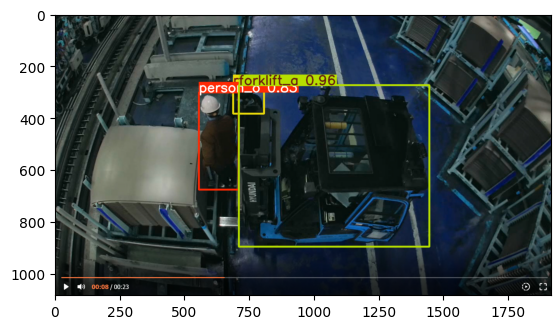

In [ ]:
# cap=cv2.VideoCapture(r'실험\image\포크부분.png')
# ret,frame=cap.read()
import datetime
import os

frame=cv2.imread(r'실험\image\포크부분.png')
result=model.predict(frame)
ratio=0.7
for r in result:
    i=r.plot()
    DF=r.to_df()
    personDF=DF[(DF['class']==0)|(DF['class']==1)]  # 사람 관련 DF
    carDF=DF.drop(personDF.index)       # 차량 관련 DF
    w,a,s,d=0,0,0,0                           # 4방향 가중치 초기화
    if len(personDF)*len(carDF):        # 차와 사람이 둘다있을경우만 진행
        for c_idx in carDF.index:
            c=carDF.loc[c_idx,'box']
            if carDF.loc[c_idx,'class']==2:            # w 방향 가중치
                w=ratio
            elif carDF.loc[c_idx,'class']==3:           # a 방향 가중치
                a=ratio
            elif carDF.loc[c_idx,'class']==4:           # s 방향 가중치
                s=ratio
            elif carDF.loc[c_idx,'class']==3:           # d 방향 가중치
                d=ratio
            wid=c['x2']-c['x1']         # 차너비
            hei=c['y2']-c['y1']         # 차높이
            for p in personDF.box:
                if ((c['x1']-wid*a<=p['x1']<=c['x2']+wid*d) or (c['x1']-wid*a<=p['x2']<=c['x2']+wid*d)) and ((c['y1']-hei*w<=p['y1']<=c['y2']+hei*s) or (c['y1']-hei*w<=p['y2']<=c['y2']+hei*s)) :
                     
                    now=datetime.datetime.now().strftime('%Y_%m_%d')
                    print('사고발생시간',now)
                    if not os.path.exists('log/'):
                        os.mkdir('log/')
                    with open(f'log/{now}.txt',mode='a+') as f:
                        f.write(f'{now} 사고났다. \n')

                
                else:
                    print('사고안남')
    else:
        print('뭐없음')
plt.imshow(i)

In [37]:
cnt=0


0: 384x640 1 person_o, 1 person_x, 1 forklift_a, 41.0ms
Speed: 2.0ms preprocess, 41.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
7


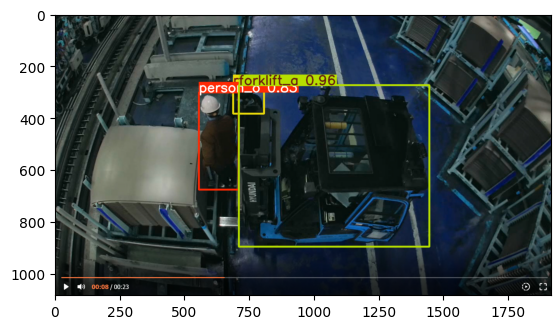

In [56]:
# cap=cv2.VideoCapture(r'실험\image\포크부분.png')
# ret,frame=cap.read()
frame=cv2.imread(r'실험\image\포크부분.png')
result=model.predict(frame)
ratio=0.7
for r in result:
    i=r.plot()
    DF=r.to_df()
    cnt=car_accident(DF,cnt)
plt.imshow(i)

In [ ]:
def car_accident(DF,cnt,ratio=0.7):
    if len(DF):
        personDF=DF[(DF['class']==0)|(DF['class']==1)]  # 사람 관련 DF
        carDF=DF.drop(personDF.index)       # 차량 관련 DF
        w,a,s,d=0,0,0,0                     # 4방향 가중치 초기화
        accident=False
        if len(personDF)*len(carDF):        # 차와 사람이 둘다있을경우만 진행
            for c_idx in carDF.index:
                c=carDF.loc[c_idx,'box']
                if carDF.loc[c_idx,'class']==2:            # w 방향 가중치
                    w=ratio
                elif carDF.loc[c_idx,'class']==3:           # a 방향 가중치
                    a=ratio
                elif carDF.loc[c_idx,'class']==4:           # s 방향 가중치
                    s=ratio
                elif carDF.loc[c_idx,'class']==3:           # d 방향 가중치
                    d=ratio
                wid=c['x2']-c['x1']         # 차너비
                hei=c['y2']-c['y1']         # 차높이
                for p in personDF.box:
                    if ((c['x1']-wid*a<=p['x1']<=c['x2']+wid*d) or (c['x1']-wid*a<=p['x2']<=c['x2']+wid*d)) and ((c['y1']-hei*w<=p['y1']<=c['y2']+hei*s) or (c['y1']-hei*w<=p['y2']<=c['y2']+hei*s)) :
                        accident+=True
                        break
                    else:
                        accident+=False
    if accident:
        cnt+=1
    else:
        cnt-=1
        if cnt<0:
            cnt=0
    print(cnt)
    return cnt

In [ ]:
def make_log()
    now=datetime.datetime.now().strftime('%Y_%m_%d')
    print('사고발생시간',now)
    if not os.path.exists('log/'):
        os.mkdir('log/')
    with open(f'log/{now}.txt',mode='a+') as f:
        f.write(f'video_name 0 case_car {now} vidio_path\n')
        

In [48]:
False+False

0

In [ ]:
if

NameError: name 'n' is not defined